In [226]:
import requests
import pandas as pd
from matplotlib import pyplot as plt 
from matplotlib.ticker import FuncFormatter
plt.style.use('ggplot')

In [24]:
# get historcal with basic data
# response = requests.get("https://api.llama.fi/protocol/uniswap")
# print(response.status_code)
# print(response.json())

200
{'id': '1', 'name': 'Uniswap', 'address': '0x1f9840a85d5af5bf1d1762f925bdaddc4201f984', 'symbol': 'UNI', 'url': 'https://info.uniswap.org/', 'description': 'A fully decentralized protocol for automated liquidity provision on Ethereum.\r\n', 'chain': 'Ethereum', 'logo': 'https://icons.llama.fi/uniswap.png', 'audits': '2', 'audit_note': None, 'gecko_id': 'uniswap', 'cmcId': '7083', 'category': 'Dexes', 'chains': ['Optimism', 'Ethereum', 'Arbitrum'], 'module': 'uniswap/index.js', 'twitter': 'Uniswap', 'audit_links': ['https://github.com/Uniswap/uniswap-v3-core/tree/main/audits', 'https://github.com/Uniswap/uniswap-v3-periphery/tree/main/audits', 'https://github.com/ConsenSys/Uniswap-audit-report-2018-12'], 'oracles': ['Uniswap'], 'methodology': "Counts the tokens locked on AMM pools, pulling the data from the 'ianlapham/uniswapv2' subgraph", 'misrepresentedTokens': True, 'hallmarks': [[1598412107, 'SushiSwap launch'], [1599535307, 'SushiSwap migration'], [1600226507, 'LM starts'], [16

In [11]:
# get protocol tvl 
response = requests.get("https://api.llama.fi/protocols")
output = response.json()

# market dataframe
df_market = pd.DataFrame(output)
market_list = pd.read_csv("protocols_list.csv")
df_market = df_market[df_market['slug'].isin(market_list['slug'])]
df_market = df_market[['name', 'symbol', 'chain', 'category', 'tvl', 'change_1h', 'change_1d', 'change_7d', 'mcap']]

# chainlink dataframe
df_chainlink = pd.DataFrame(output)
chainlink_list = pd.read_csv("chainlink_users_list.csv")
df_chainlink = df_chainlink[df_chainlink['slug'].isin(chainlink_list['slug'])]
df_chainlink = df_chainlink[['name', 'symbol', 'chain', 'category', 'tvl', 'change_1h', 'change_1d', 'change_7d', 'mcap']]

In [247]:
# get count statistics by chain
df_market_chain_count = df_market.groupby(['chain']).size().reset_index(name='Market').fillna(0).set_index('chain').astype(int)
df_chainlink_chain_count = df_chainlink.groupby(['chain']).size().reset_index(name='Chainlink').fillna(0).set_index('chain').astype(int)

# get sum tvl statistics by chain
df_market_chain_sum = df_market.groupby(['chain']).sum().reset_index().fillna(0).set_index('chain').astype(int)
df_market_chain_sum.columns = ['tvl', 'net_change_1h', 'net_change_1d', 'net_change_7d', 'mcap']
df_chainlink_chain_sum = df_chainlink.groupby(['chain']).sum().reset_index().fillna(0).set_index('chain').astype(int)
df_chainlink_chain_sum.columns = ['tvl', 'net_change_1h', 'net_change_1d', 'net_change_7d', 'mcap']

# get count statistics by category
df_market_category_count = df_market.groupby(['category']).size().reset_index(name='Market').fillna(0).set_index('category').astype(int)
df_chainlink_category_count = df_chainlink.groupby(['category']).size().reset_index(name='Chainlink').fillna(0).set_index('category').astype(int)

# get sum tvl statistics by category
df_market_category_sum = df_market.groupby(['category']).sum().reset_index().fillna(0).set_index('category').astype(int)
df_market_category_sum.columns = ['tvl', 'net_change_1h', 'net_change_1d', 'net_change_7d', 'mcap']
df_chainlink_category_sum = df_chainlink.groupby(['category']).sum().reset_index().fillna(0).set_index('category').astype(int)
df_chainlink_category_sum.columns = ['tvl', 'net_change_1h', 'net_change_1d', 'net_change_7d', 'mcap']

# average tvl to market cap 

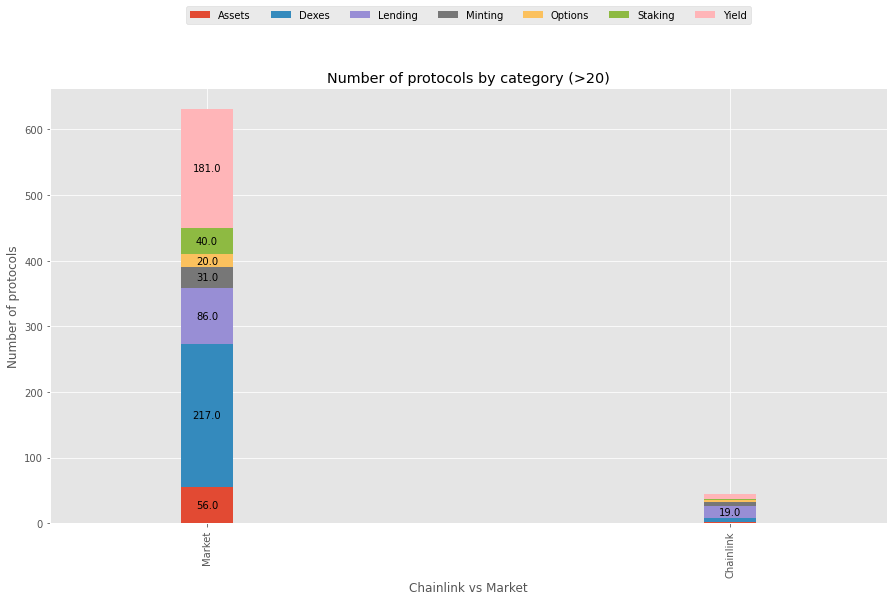

In [211]:
# plot count statistics by category
union = pd.concat([df_market_category_count.transpose(), df_chainlink_category_count.transpose()],axis=0)
union = union.loc[:, (union.sum() >= 20)] #too many categories, only plotting the largest
ax = union.plot.bar(stacked=True, width = 0.1, figsize= (15,8))
for c in ax.containers:
    labels = [v.get_height() if v.get_height() > 10 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='center')
plt.xlabel('Chainlink vs Market')
plt.ylabel('Number of protocols')
plt.title('Number of protocols by category (>20)')
plt.legend( ncol=8 , loc = 'upper center', bbox_to_anchor=(0.5, 1.2))
plt.show()

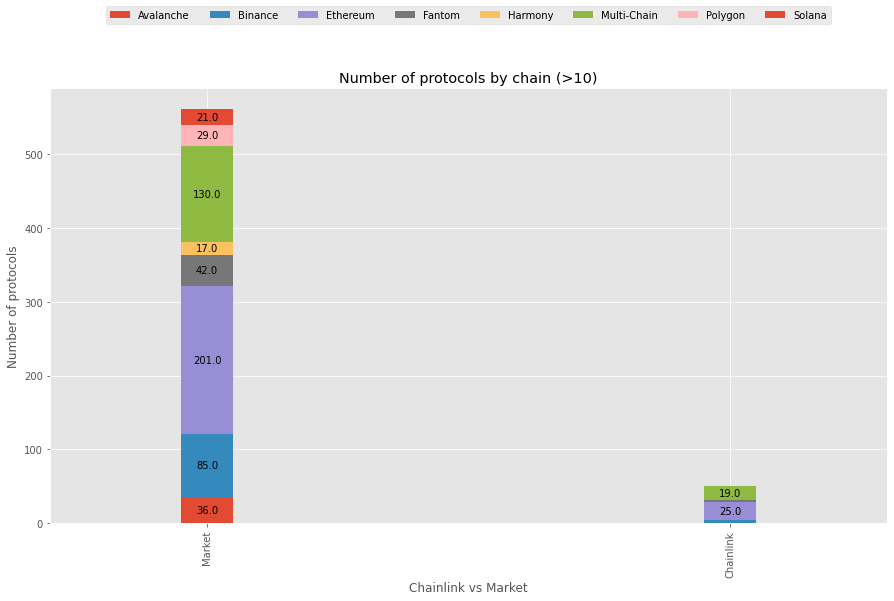

In [212]:
# plot count statistics by chain
union = pd.concat([df_market_chain_count.transpose(), df_chainlink_chain_count.transpose()],axis=0)
union = union.loc[:, (union.sum() >= 15)] #too many categories, only plotting the largest
ax = union.plot.bar(stacked=True, width = 0.1, figsize= (15,8))
for c in ax.containers:
    labels = [v.get_height() if v.get_height() > 10 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='center')
plt.xlabel('Chainlink vs Market')
plt.ylabel('Number of protocols')
plt.title('Number of protocols by chain (>10)')
plt.legend( ncol=8 , loc = 'upper center', bbox_to_anchor=(0.5, 1.2))
plt.show()

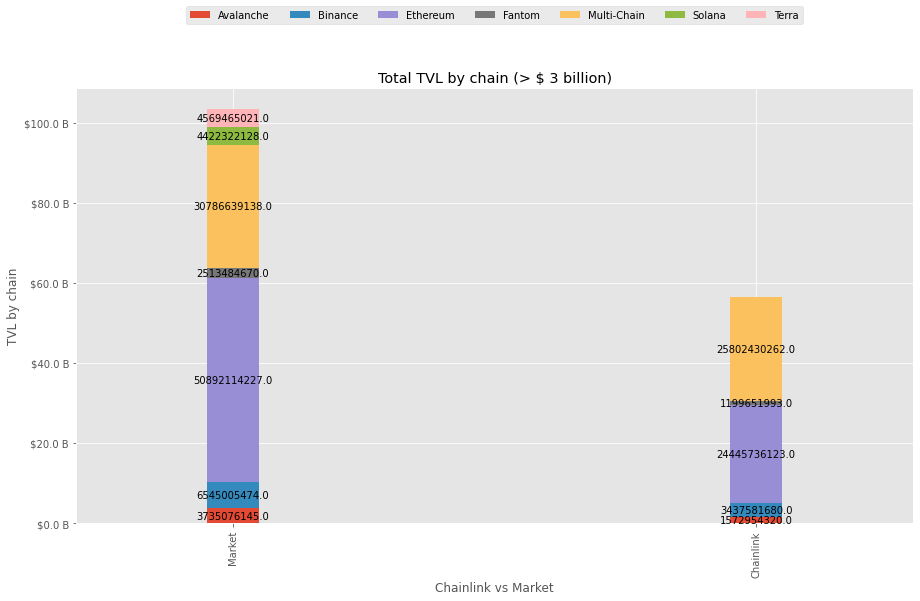

In [238]:
# plot sum statistics by chain
union = pd.concat([df_market_chain_sum[['tvl']].transpose(), df_chainlink_chain_sum[[ 'tvl']].transpose()],axis=0)
union = union.loc[:, (union.sum() >= 3000000000)] #too many categories, only plotting the largest
union.index = ['Market', 'Chainlink']
ax = union.plot.bar(stacked=True, width = 0.1, figsize= (15,8))
def millions_formatter(x, pos):
    return f'${x / 1000000000} B'
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
for c in ax.containers:
    labels = [v.get_height() if v.get_height() > 10 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='center')
plt.xlabel('Chainlink vs Market')
plt.ylabel('TVL by chain')
plt.title('Total TVL by chain (> $ 3 billion)')
plt.legend( ncol=8 , loc = 'upper center', bbox_to_anchor=(0.5, 1.2))
plt.show()

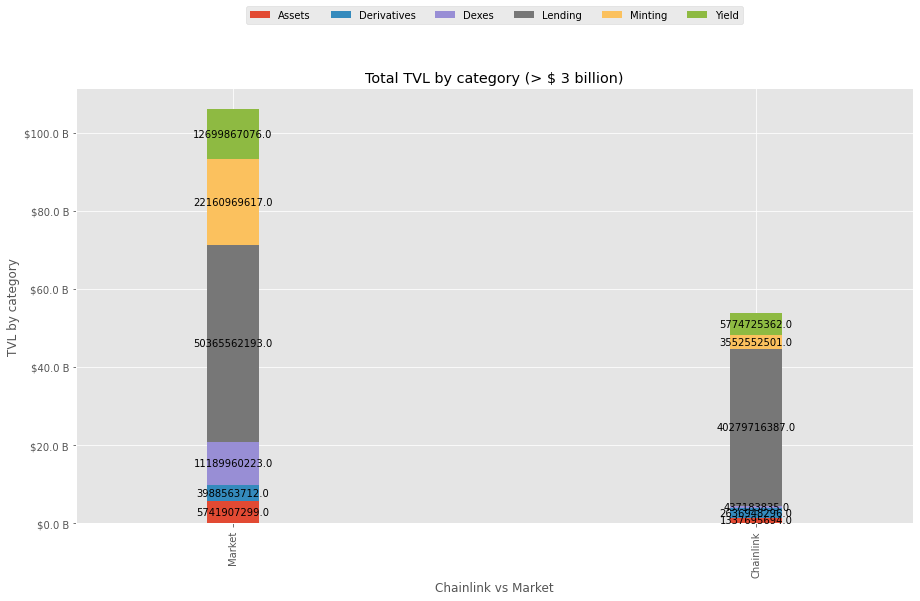

In [240]:
# plot sum statistics by category
union = pd.concat([df_market_category_sum[['tvl']].transpose(), df_chainlink_category_sum[['tvl']].transpose()],axis=0)
union = union.loc[:, (union.sum() >= 3000000000)] #too many categories, only plotting the largest
union.index = ['Market', 'Chainlink']
ax = union.plot.bar(stacked=True, width = 0.1, figsize= (15,8))
def millions_formatter(x, pos):
    return f'${x / 1000000000} B'
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
for c in ax.containers:
    labels = [v.get_height() if v.get_height() > 10 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='center')
plt.xlabel('Chainlink vs Market')
plt.ylabel('TVL by category')
plt.title('Total TVL by category (> $ 3 billion)')
plt.legend( ncol=8 , loc = 'upper center', bbox_to_anchor=(0.5, 1.2))
plt.show()

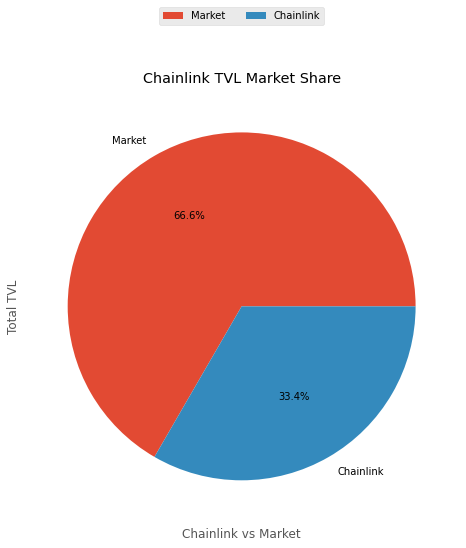

In [299]:
# plot tvl captured 
df_chainlink_total_sum = df_chainlink_chain_sum.sum(axis=0).reset_index(name='Chainlink').transpose()
df_chainlink_total_sum.columns = df_chainlink_total_sum.iloc[0]
df_chainlink_total_sum = df_chainlink_total_sum.iloc[1:,:]
df_market_total_sum = df_market_chain_sum.sum(axis=0).reset_index(name='Market').transpose()
df_market_total_sum.columns = df_market_total_sum.iloc[0]
df_market_total_sum = df_market_total_sum.iloc[1:,:]
union = pd.concat([df_market_total_sum['tvl'], df_chainlink_total_sum['tvl']],axis=0)

ax = union.plot.pie(subplots=True, figsize= (15,8), autopct='%1.1f%%')
plt.xlabel('Chainlink vs Market')
plt.ylabel('Total TVL')
plt.title('Chainlink TVL Market Share')
plt.legend( ncol=8 , loc = 'upper center', bbox_to_anchor=(0.5, 1.2))
plt.show()

In [279]:
# plot number of protocols captured 
df_chainlink_total_count = df_chainlink_chain_count.sum(axis=0).reset_index(name='Chainlink').transpose()
df_chainlink_total_count.columns = df_chainlink_total_count.iloc[0]
df_chainlink_total_count = df_chainlink_total_count.iloc[1:,:]
df_chainlink_total_count['']
df_market_total_count = df_market_chain_count.sum(axis=0).reset_index(name='Market').transpose()
df_market_total_count.columns = df_market_total_count.iloc[0]
df_market_total_count = df_market_total_count.iloc[1:,:]
union = pd.concat([df_market_total_count, df_chainlink_total_count],axis=0)

ax = union.plot.pie(subplots=True, figsize= (15,8), autopct='%1.1f%%')
plt.xlabel('Chainlink vs Market')
plt.ylabel('Total TVL')
plt.title('Chainlink TVL Market Share')
plt.legend( ncol=8 , loc = 'upper center', bbox_to_anchor=(0.5, 1.2))
plt.show()

index,tvl,net_change_1h,net_change_1d,net_change_7d,mcap
Market,114051482548,-268,-659,1339,74202858241
Chainlink,57079607938,-9,-225,793,18496538293


In [306]:
df_chainlink_total_count = df_chainlink_chain_count.sum(axis=0).reset_index(name='Chainlink').transpose()
df_chainlink_total_count.columns = df_chainlink_total_count.iloc[0]
df_chainlink_total_count = df_chainlink_total_count.iloc[1:,:]

In [303]:
df_chainlink_total_count

index,Chainlink
Chainlink,54


In [260]:
df_chainlink_chain_sum

,tvl,net_change_1h,net_change_1d,net_change_7d,mcap
chain,,,,,
Avalanche,1572954320,0,-4,5,201291941
Binance,3437581680,-1,-20,-42,353259459
Ethereum,24445736123,3,-119,932,8862822030
Fantom,1199651993,-1,-4,-23,67442149
Heco,156067614,-8,-16,-15,8303812
Kava,453822947,0,-3,-3,713606707
Multi-Chain,25802430262,-3,-69,-56,7618894604
xDai,11362999,1,10,-5,670917591


In [249]:
# plot number of protocols captured
df_market_chain_count

,Market
chain,
Algorand,2
Arbitrum,11
Aurora,1
Avalanche,36
Binance,85
...,...
ZYX,1
Zilliqa,1
smartBCH,2
